# Kaggle Competition - Quant & Machine Learning Course
# Tutorial 3: Basic Data Preprocessing & Visualization
Modified based on reference https://heartbeat.fritz.ai/data-preprocessing-and-visualization-implications-for-your-machine-learning-model-8dfbaaa51423

In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np

In [3]:
#load the chocolate data - Keep the data file in the same folder as #your python code
chocolate_data = pd.read_csv("~/Documents/deep-learning/quant_course/data/flavors_of_cacao.csv")
#have a look at the data
chocolate_data.head()

,Company,Specific-Bean-Origin-or-Bar-Name,REF,Review-Date,Cocoa-Percent,Company-Location,Rating,Bean-Type,Broad-Bean-Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
# Let's have a look how many values are missing.
chocolate_data.isnull().sum()

Company                             0
Specific-Bean-Origin-or-Bar-Name    0
REF                                 0
Review-Date                         0
Cocoa-Percent                       0
Company-Location                    0
Rating                              0
Bean-Type                           1
Broad-Bean-Origin                   1
dtype: int64

In [5]:
#Lets have a look at the data and see identify Object/Categorical values and Continuous values
chocolate_data.dtypes

Company                              object
Specific-Bean-Origin-or-Bar-Name     object
REF                                   int64
Review-Date                           int64
Cocoa-Percent                        object
Company-Location                     object
Rating                              float64
Bean-Type                            object
Broad-Bean-Origin                    object
dtype: object

In [6]:
original_col = chocolate_data.columns
new_col = ['Company', 'Species', 'REF', 'ReviewDate', 'CocoaPercent','CompanyLocation', 'Rating', 'BeanType', 'Country']
chocolate_data =chocolate_data.rename(columns=dict(zip(original_col, new_col)))
chocolate_data.head()

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [10]:
#Remove % sign from CocoaPercent column 
chocolate_data['CocoaPercent'] = chocolate_data['CocoaPercent'].str.replace('%','').astype(float)/100
chocolate_data.head()

,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [11]:
chocolate_data['BlendNotBlend'] = np.where(np.logical_or(np.logical_or(chocolate_data['Species'].str.lower().str.contains(',|(blend)|;'),chocolate_data['Country'].str.len() == 1), chocolate_data['Country'].str.lower().str.contains(',')), 1, 0)
chocolate_data.head()

/var/folders/13/6vxftn494dx09z62qly7ndxr0000gn/T/ipykernel_4242/156075101.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  chocolate_data['BlendNotBlend'] = np.where(np.logical_or(np.logical_or(chocolate_data['Species'].str.lower().str.contains(',|(blend)|;'),chocolate_data['Country'].str.len() == 1), chocolate_data['Country'].str.lower().str.contains(',')), 1, 0)


,Company,Species,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,Country,BlendNotBlend
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome,0
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo,0
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo,0
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo,0
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru,0


# Data Visualization
Visualization impacts modeling in many ways, but it’s especially handy in the EDA (Exploratory Data Analysis) phase, where you try to understand patterns in the data. 
## 1. Histogram Plot

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/nanli/anaconda/envs/quant-course/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


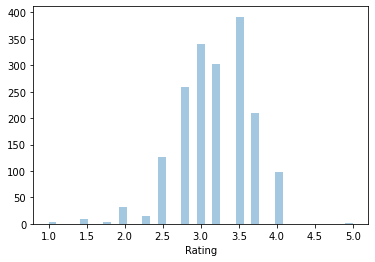

In [14]:
#Let's see the distribution of continuous variables
sns.distplot(chocolate_data['Rating'],kde=False)
plt.show()

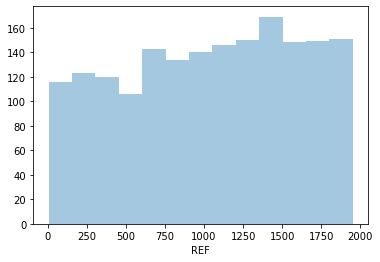

In [22]:
sns.distplot(chocolate_data['REF'],kde = False)
plt.show()

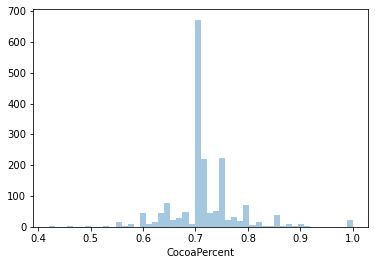

In [23]:
sns.distplot(chocolate_data['CocoaPercent'],kde = False)
plt.show()

## 2. Box Plot

Text(0.5, 1.0, 'Boxplot, Rating for countries (+blends)')

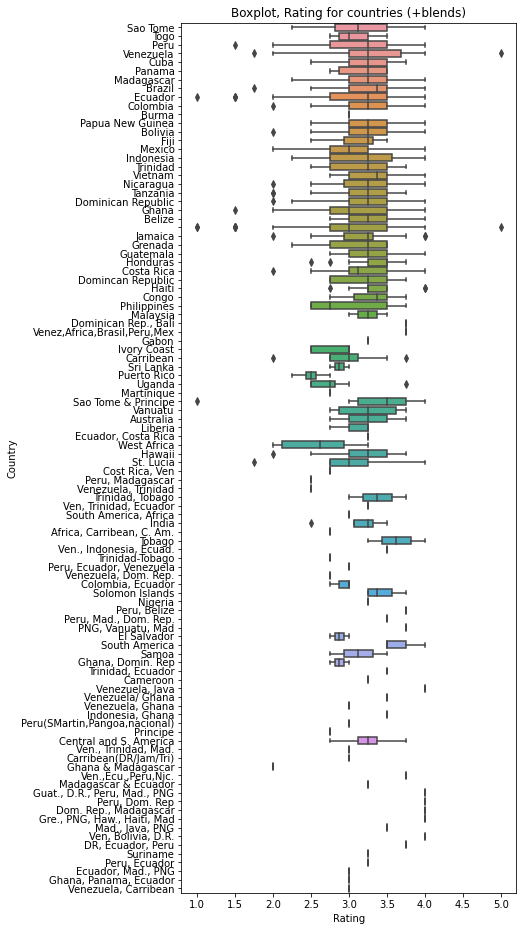

In [16]:
# Look at boxplot over the countries, even Blends
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(
    data=chocolate_data,
    y='Country',
    x='Rating'
)
ax.set_title('Boxplot, Rating for countries (+blends)')

## 3. Violin plot

Text(0.5, 1.0, 'Boxplot, Rating by Blend/Pure')

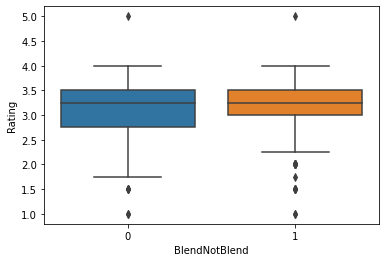

In [27]:
#1.Box plot (small one unlike the above box plot)
sns.boxplot(
    data=chocolate_data,
    x='BlendNotBlend',
    y='Rating',
)
ax.set_title('Boxplot, Rating by Blend/Pure')

/Users/nanli/anaconda/envs/quant-course/lib/python3.9/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/Users/nanli/anaconda/envs/quant-course/lib/python3.9/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


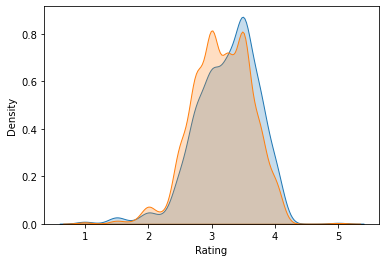

In [28]:
#2. KDE (kernel density plot)- Let’s try and plot the same thing using a KDE plot.
Blended = chocolate_data.loc[chocolate_data.BlendNotBlend == 1]
NotBlended = chocolate_data.loc[chocolate_data.BlendNotBlend == 0]
ax = sns.kdeplot(Blended.Rating,
                  shade=True,shade_lowest=False, label = "Blend")
ax = sns.kdeplot(NotBlended.Rating,
                  shade=True,shade_lowest=False, label = "Pure")

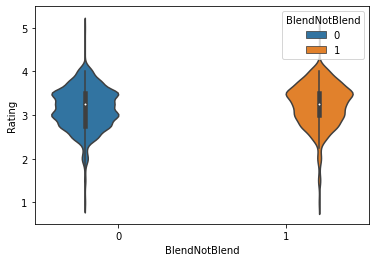

In [32]:
# 3. Violin Plot- We will now put together the box plot and KDE plot.
ax = sns.violinplot(x="BlendNotBlend", y="Rating", data=chocolate_data, hue="BlendNotBlend")